<a href="https://colab.research.google.com/github/penguin-96/EDA/blob/main/Loan%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler

In [ ]:
# Loading Data in test and train data
train_dataset= pd.read_csv("/content/Training Data.csv")  # train data

test_dataset= pd.read_csv("/content/Test Data.csv")  # test data

In [ ]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [ ]:
# creating numerical and categorical variables
# checking for Cardinality in Categorical Features

num_col = [i for i in train_dataset.columns[:-1] if train_dataset[i].dtype != 'object']
cat_col = [i for i in train_dataset.columns if train_dataset[i].dtype == 'object']

for i in cat_col:
  unique_value= train_dataset[i].nunique()
  print("Unique Value in " + i, unique_value)

Unique Value in Married/Single 2
Unique Value in House_Ownership 3
Unique Value in Car_Ownership 2
Unique Value in Profession 51
Unique Value in CITY 317
Unique Value in STATE 29


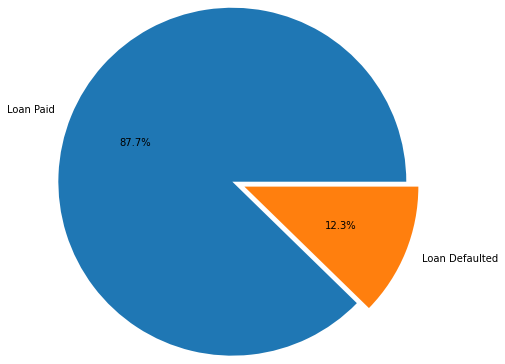

In [ ]:
# no of defaulters
pie= train_dataset.groupby('Risk_Flag')['Risk_Flag'].count()
plt.pie(pie, explode=[0.05, 0.1], labels=['Loan Paid', 'Loan Defaulted'], radius=2, autopct='%1.1f%%');

## Visualization

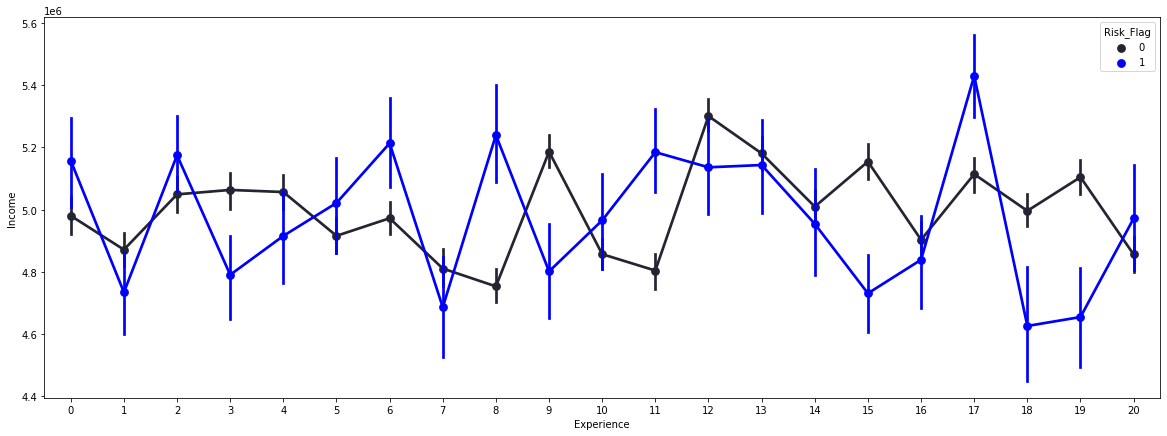

In [ ]:
plt.figure(figsize=(20,7))
sns.pointplot(data=train_dataset,x='Experience',y='Income', hue= 'Risk_Flag',color='blue')
#C1.set_xticklabels(C1.get_xticklabels(), rotation=45, horizontalalignment='right')

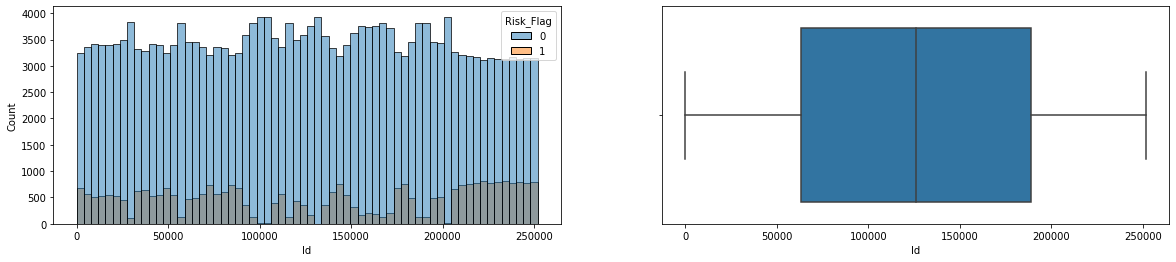

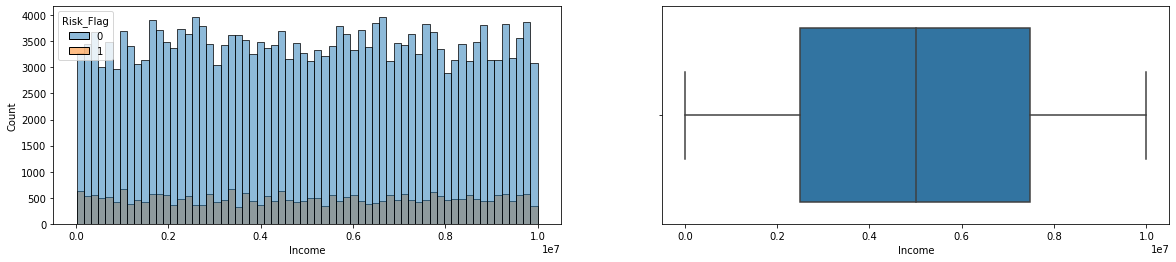

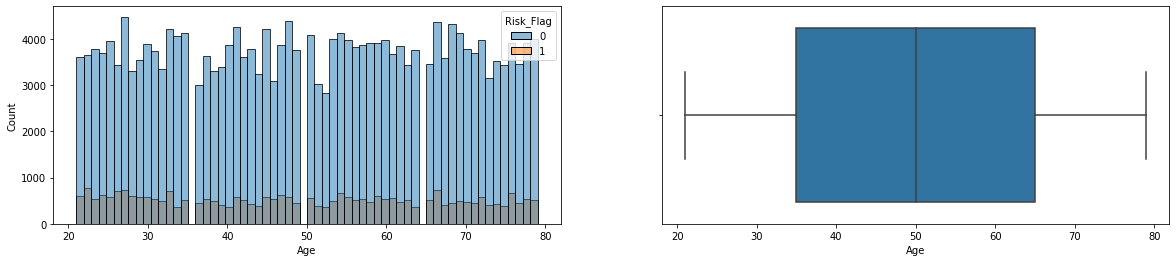

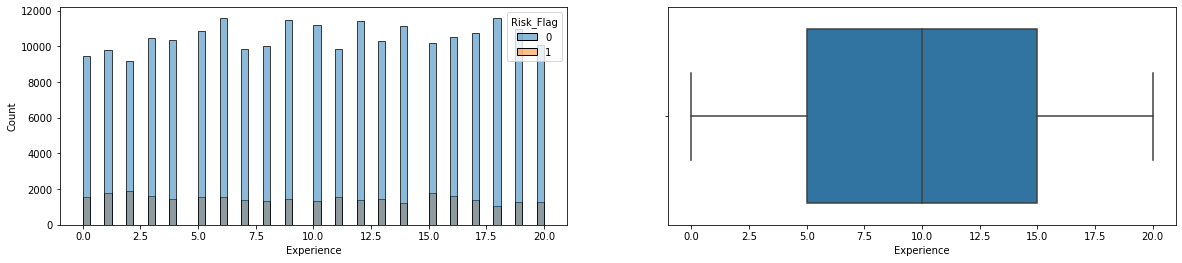

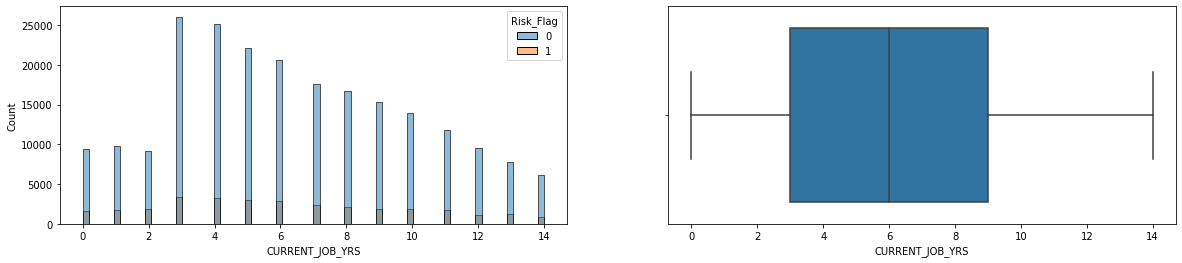

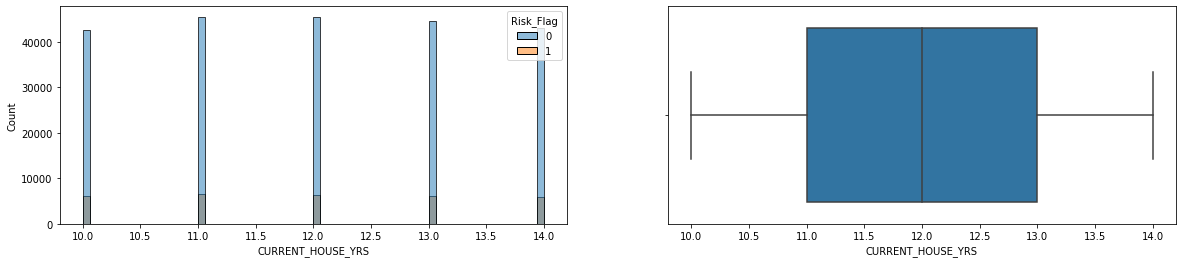

In [ ]:
# checking histogram and box plot of the numerical variables for range and outlier detection

for i in num_col:
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,4))
  sns.histplot(data=train_dataset, x= i, hue= 'Risk_Flag', ax=ax[0])
  sns.boxplot(data=train_dataset, x= i, ax=ax[1]);

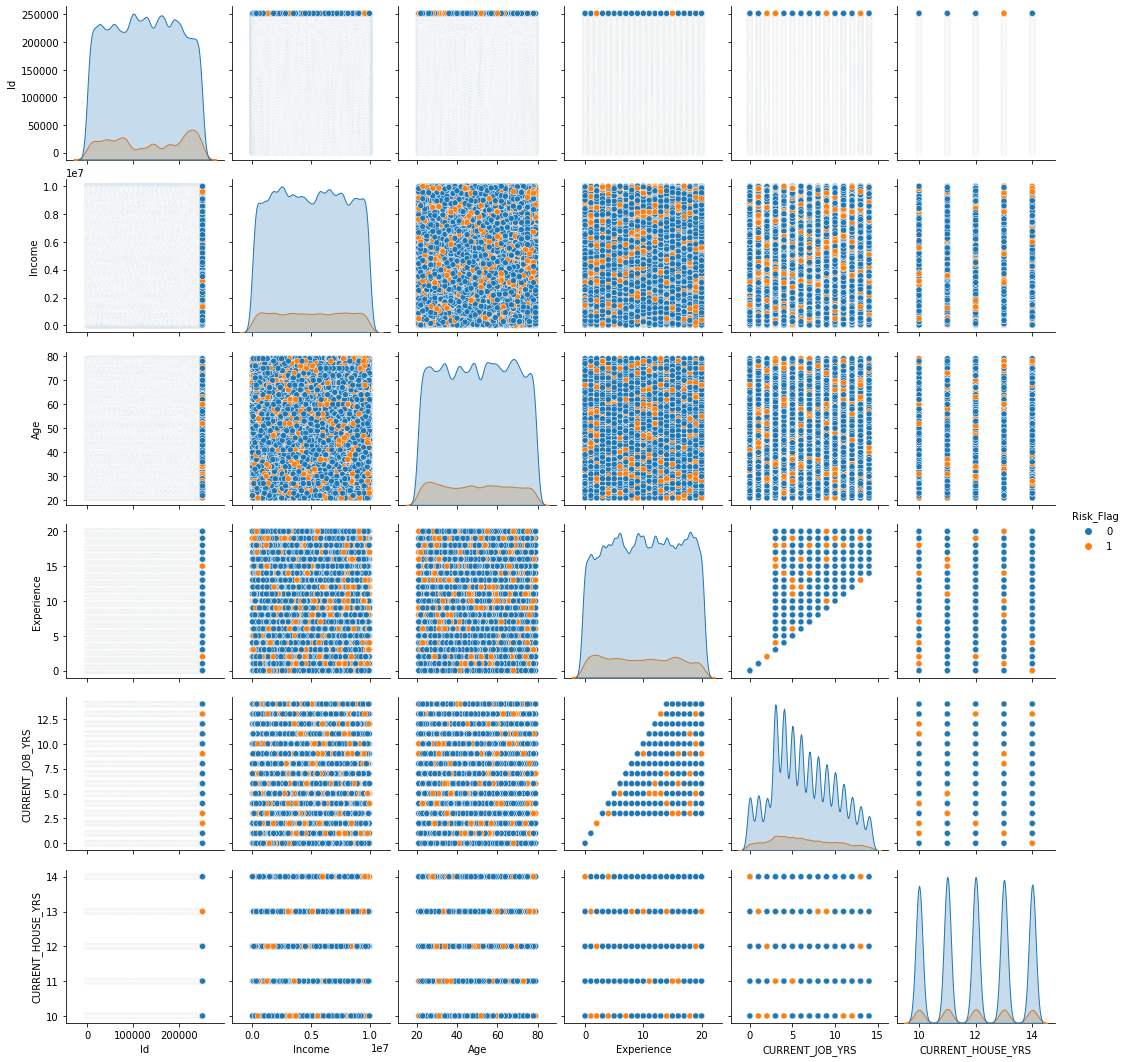

In [ ]:
# Dataset pairplot wrt to Risk Flag
sns.pairplot(train_dataset, kind= 'scatter', hue='Risk_Flag')
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap')

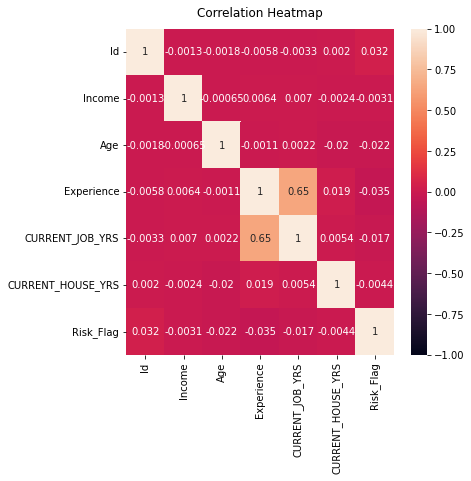

In [ ]:
# correlation Matrix
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(train_dataset.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

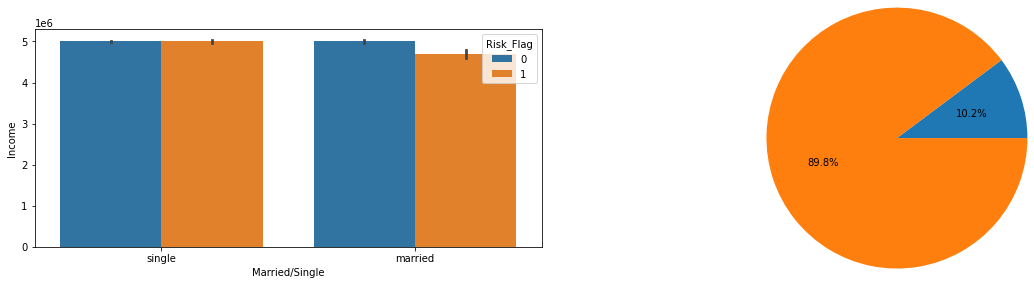

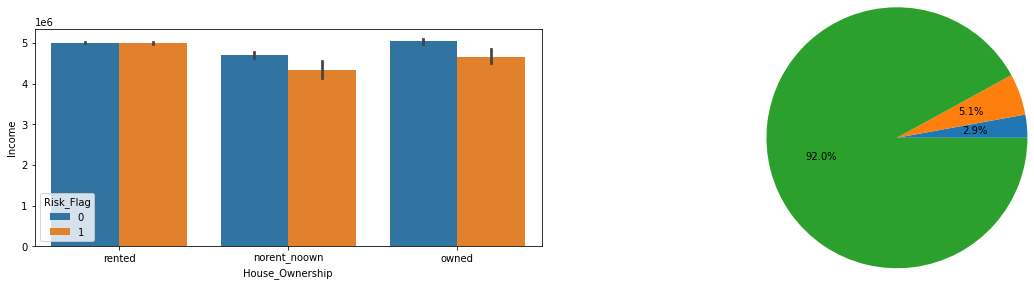

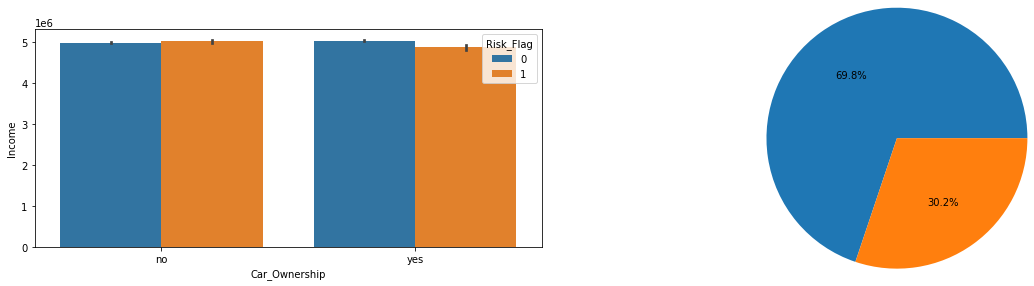

In [ ]:
# Effect of Marital Status, Car & House Ownership on Risk Flag

for i in cat_col[:3]:
  fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,4))
  sns.barplot(y= "Income", x= i, hue= 'Risk_Flag', data = train_dataset, ax=ax[0])
  pie= train_dataset.groupby(i)[i].count()
  plt.pie(pie, radius=1.5, autopct='%1.1f%%')


In [ ]:
# Income of top 10 loan defaulting professions (https://www.kaggle.com/shahidmandal/loan-prediction-based-on-customer-behaviour)
def cat_income_analysis(data):
  data_cat = data.loc[data['Risk_Flag'] == 1].groupby([i]).mean()[['Income']].sort_values(by='Income',ascending=False)
  data_cat.sort_values(by='Income',ascending=False)[:10].plot(kind='barh',figsize=(10,10))
  
  plt.title('Mean Income of Top 10 Loan Defaulting'+ i) 
  plt.xlabel('Income')
  plt.ylabel(i)

  for index,value in enumerate(data_cat['Income'][:10]):
      plt.text(value-900000,index-0.1,str(int(value)))

  plt.legend(loc='best')
  plt.show()


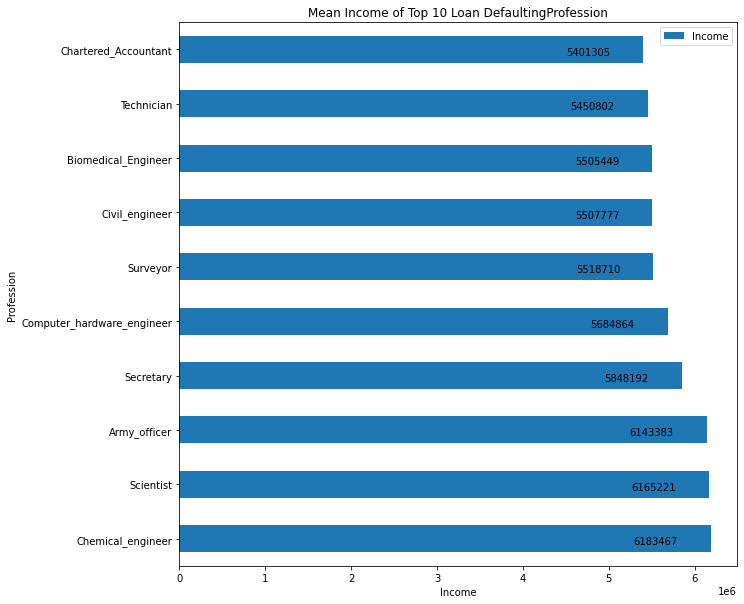

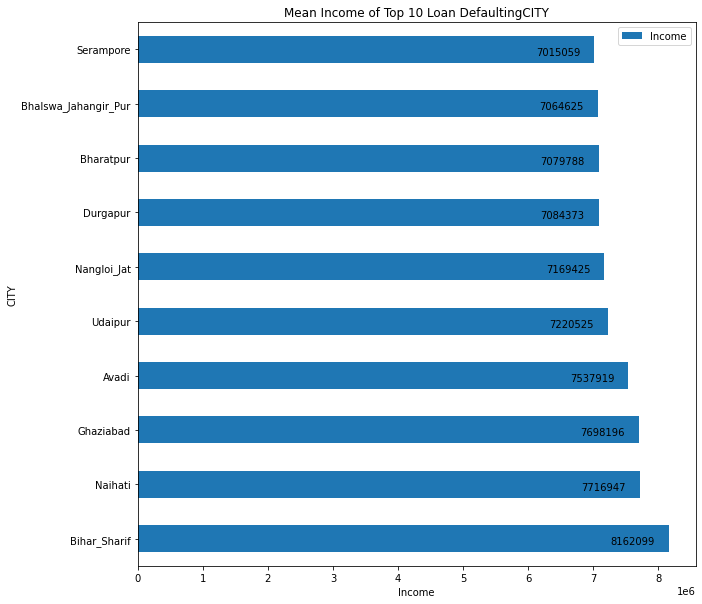

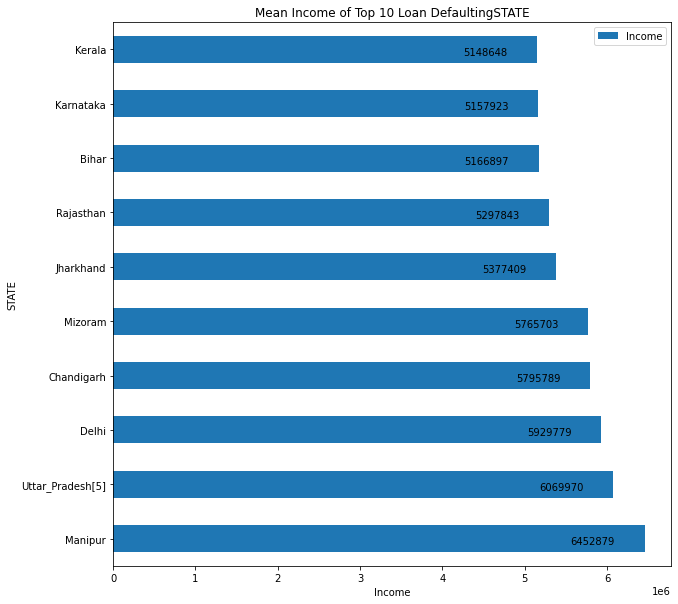

In [ ]:
for i in cat_col[3:]:
  cat_income_analysis(train_dataset)

## Chi-Square testing for Categorical Variables

In [ ]:
# code source: https://www.geeksforgeeks.org/python-pearsons-chi-square-test/
# Crosstable : https://www.geeksforgeeks.org/contingency-table-in-python/

from scipy.stats import chi2_contingency

def chi_sqr(data):
  stat, p, dof, expected = chi2_contingency(data)
  
  # interpret p-value
  alpha = 0.05
  print("p value is " + str(p))
  if p <= alpha:
      print('Dependent (reject H0)')
  else:
      print('Independent (H0 holds true)')


# creating crosstables for chi square test

Profession_risk_flag = pd.crosstab(train_dataset["Profession"], train_dataset["Risk_Flag"])
CITY_risk_flag = pd.crosstab(train_dataset["CITY"], train_dataset["Risk_Flag"])
STATE_risk_flag = pd.crosstab(train_dataset["STATE"], train_dataset["Risk_Flag"])

In [ ]:
# CHI-SQUARE TESTING FOR CATEGORICAL VARIABLES WRT TO RISK FLAG
# H0 : there is no relation between the variable (Profession, City, State) and the Risk_Flag (Independent Variable)
# H1 : There is relation between the vaiable and the Risk Flag

cat_chi_sqr = [Profession_risk_flag, CITY_risk_flag, STATE_risk_flag]

for i in cat_chi_sqr:
  chi_sqr(i)

p value is 5.108641602000937e-98
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 2.0057472384130266e-136
Dependent (reject H0)
